In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
##pip install geopandas --upgrade

In [3]:
routes = gpd.read_file('../data/solid-waste-and-recycling-collection-routes.geojson')
print(routes.crs)
routes.head()

EPSG:4326


,day,cycle,rec_pickup,sw_pickup,yw_pickup,geo_shape,geo_point_2d,square_miles,geometry
0,Thursday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.894369295530169, ""lat"": 35.801666...",0.001647,"POLYGON ((-78.89446 35.80185, -78.8945 35.8019..."
1,Wednesday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.768080778258948, ""lat"": 35.791947...",0.002533,"POLYGON ((-78.76779 35.79146, -78.76791 35.791..."
2,Tuesday,Yellow,Yes,Yes,Yes,None,"{ ""lon"": -78.812139633757027, ""lat"": 35.815972...",0.012383,"MULTIPOLYGON (((-78.81136 35.81724, -78.81136 ..."
3,Thursday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.800928154380841, ""lat"": 35.695319...",0.096303,"MULTIPOLYGON (((-78.80266 35.69623, -78.80266 ..."
4,Wednesday,Blue,No,Yes,Yes,None,"{ ""lon"": -78.782115010688685, ""lat"": 35.775422...",0.001173,"POLYGON ((-78.78182 35.77567, -78.78183 35.775..."


In [6]:
type(routes)

geopandas.geodataframe.GeoDataFrame

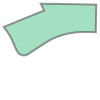

In [33]:
routes.loc[0, 'geometry']

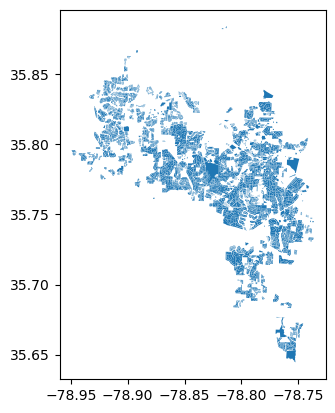

In [8]:
routes.plot();

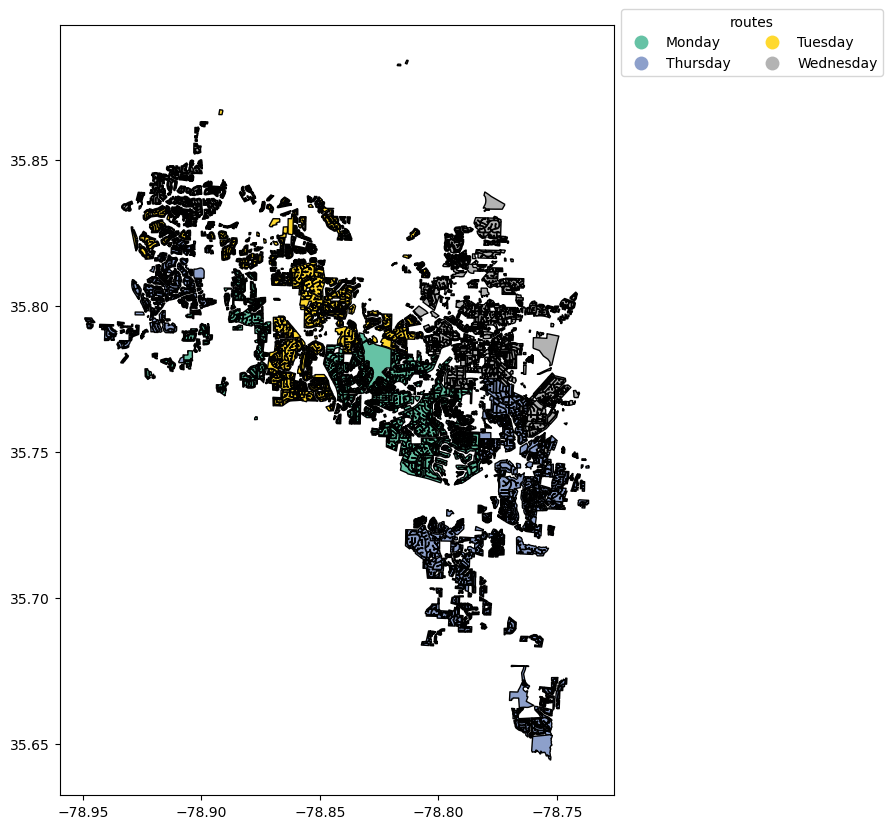

In [10]:
leg_kwds = {'title': 'routes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

routes.plot(column = 'day', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [11]:
routes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   day           443 non-null    object  
 1   cycle         435 non-null    object  
 2   rec_pickup    443 non-null    object  
 3   sw_pickup     443 non-null    object  
 4   yw_pickup     443 non-null    object  
 5   geo_shape     0 non-null      object  
 6   geo_point_2d  441 non-null    object  
 7   square_miles  443 non-null    float64 
 8   geometry      441 non-null    geometry
dtypes: float64(1), geometry(1), object(7)
memory usage: 31.3+ KB


In [16]:
route=routes.drop(columns='square_miles')

In [21]:
route[route['cycle']=='Blue']

,day,cycle,rec_pickup,sw_pickup,yw_pickup,geo_shape,geo_point_2d,geometry
0,Thursday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.894369295530169, ""lat"": 35.801666...","POLYGON ((-78.89446 35.80185, -78.8945 35.8019..."
1,Wednesday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.768080778258948, ""lat"": 35.791947...","POLYGON ((-78.76779 35.79146, -78.76791 35.791..."
3,Thursday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.800928154380841, ""lat"": 35.695319...","MULTIPOLYGON (((-78.80266 35.69623, -78.80266 ..."
4,Wednesday,Blue,No,Yes,Yes,None,"{ ""lon"": -78.782115010688685, ""lat"": 35.775422...","POLYGON ((-78.78182 35.77567, -78.78183 35.775..."
5,Tuesday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.858882937346408, ""lat"": 35.788588...","POLYGON ((-78.85817 35.78885, -78.85813 35.788..."
...,...,...,...,...,...,...,...,...
436,Tuesday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.872463992036344, ""lat"": 35.774079...","MULTIPOLYGON (((-78.87255 35.77455, -78.87254 ..."
437,Monday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.791912529994676, ""lat"": 35.759853...","MULTIPOLYGON (((-78.79204 35.75907, -78.79204 ..."
440,Thursday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.800007008016891, ""lat"": 35.702233...","MULTIPOLYGON (((-78.80147 35.70276, -78.8022 3..."
441,Wednesday,Blue,Yes,Yes,Yes,None,"{ ""lon"": -78.76884123310721, ""lat"": 35.7835597...","MULTIPOLYGON (((-78.76872 35.78078, -78.76874 ..."


In [30]:
blue_route=route[route['cycle']=='Blue'].count()

In [28]:
blue_route

day             229
cycle           229
rec_pickup      229
sw_pickup       229
yw_pickup       229
geo_shape         0
geo_point_2d    228
geometry        228
dtype: int64

In [31]:
yellow_route=route[route['cycle']=='Yellow'].count()

In [32]:
yellow_route

day             206
cycle           206
rec_pickup      206
sw_pickup       206
yw_pickup       206
geo_shape         0
geo_point_2d    205
geometry        205
dtype: int64